In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

covid = pd.read_csv("../PRATICA/owid-covid-data.csv")

Dimensioni del dataset e le diciture presenti nell'intestazione

In [2]:
covid.shape

(387249, 67)

In [3]:
covid.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [4]:
covid.columns
covid.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
101592,ERI,Africa,Eritrea,2021-03-17,3038.0,0.0,13.429,7.0,0.0,0.000,...,11.4,NaN,0.70,66.32,0.459,3.684041e+06,NaN,NaN,NaN,NaN
287853,BLM,North America,Saint Barthelemy,2023-02-22,5439.0,0.0,0.571,5.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,1.099400e+04,NaN,NaN,NaN,NaN
148354,OWID_HIC,NaN,High income,2023-02-04,411625232.0,0.0,169230.000,2805362.0,0.0,955.714,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
17357,ABW,North America,Aruba,2021-04-28,10469.0,0.0,35.714,95.0,0.0,0.429,...,NaN,NaN,NaN,76.29,NaN,1.064590e+05,NaN,NaN,NaN,NaN
324563,KOR,Asia,South Korea,2023-06-25,32018486.0,113819.0,16259.857,35017.0,57.0,8.143,...,40.9,NaN,12.27,83.03,0.916,5.181581e+07,75753.484,6.95,6.43,1462.8727


* Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente

In [5]:
covid.continent.isnull().sum()

18527

In [6]:
#Total cases for all locations assigned to a continent
filter_continent = covid.continent.isna()
filter_continent = ~ filter_continent
filter_continent.value_counts()
continent_cases = covid.new_cases.loc[filter_continent].sum()
continent_cases

775021816.0

In [7]:
#Total cases per continent. Locations not assigned to a  continent are not considered.
covid_grouped = covid.groupby("continent")
total_continent_cases = covid_grouped.new_cases.sum()
total_continent_cases

continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64

Sempre riguardo i casi di COVID totali, si chiede di sviluppare una funzione che prenda in input il dataset e due nomi di continenti, e che ne confronti i seguenti relativi descrittori statistici: valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [8]:
#filtering null values in "continent" and replacing with "unassigned" in a new column named "continent_b"
covid["continent_b"] = covid["continent"].replace(np.nan,"unassigned")
grouped_covid_cont = covid.groupby("continent_b")
desc_covid =grouped_covid_cont.total_cases.describe()
desc_covid

,count,mean,std,min,25%,50%,75%,max
continent_b,,,,,,,,
Africa,82230.0,1.553786e+05,4.540602e+05,1.0,8060.0,32811.5,1.141108e+05,4072636.0
Asia,65964.0,3.183043e+06,1.047887e+07,1.0,58519.0,399449.0,1.502857e+06,99343195.0
Europe,75448.0,2.669240e+06,6.402988e+06,1.0,26408.0,343732.0,1.879480e+06,38997490.0
North America,59954.0,1.829112e+06,1.138676e+07,1.0,2922.0,14057.0,1.545380e+05,103436829.0
Oceania,26008.0,3.655040e+05,1.744544e+06,1.0,311.0,7203.0,2.654700e+04,11812024.0
South America,20538.0,3.108587e+06,7.185748e+06,1.0,66385.0,537842.0,2.251027e+06,37519960.0
unassigned,18191.0,1.080660e+08,1.589554e+08,1.0,4590965.0,44454327.0,1.411226e+08,774954379.0


Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

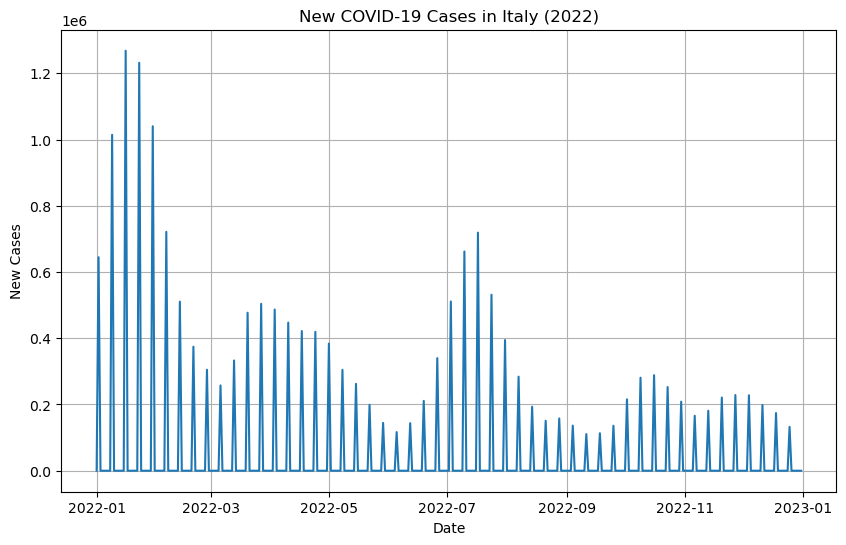

In [9]:
#changing date column data to date format
covid['date'] = pd.to_datetime(covid['date'])

# Filtering data for Italy - year 2022
italy_data_2022 = covid[(covid['location'] == 'Italy') & (covid['date'].dt.year == 2022)]
plt.figure(figsize=(10, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['new_cases'], linestyle='-')

# Adding labels and title
plt.title('New COVID-19 Cases in Italy (2022)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)             

Text(0.5, 1.0, ' Cumulative Cases of Covid-19 in Italy 2022')

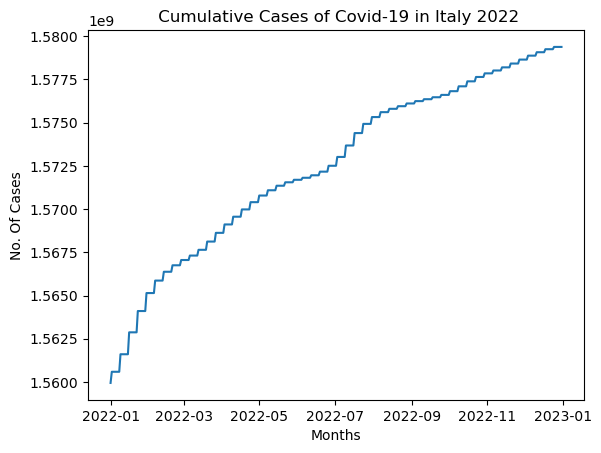

In [18]:
italy_data_2022["cum_italy"] = covid.new_cases.cumsum()
#date_2022 = covid["date"].dt.year == 2022
plt.plot(italy_data_2022["date"], italy_data_2022["cum_italy"])
plt.xlabel("Months")
plt.ylabel("No. Of Cases")
plt.title(" Cumulative Cases of Covid-19 in Italy 2022")

Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

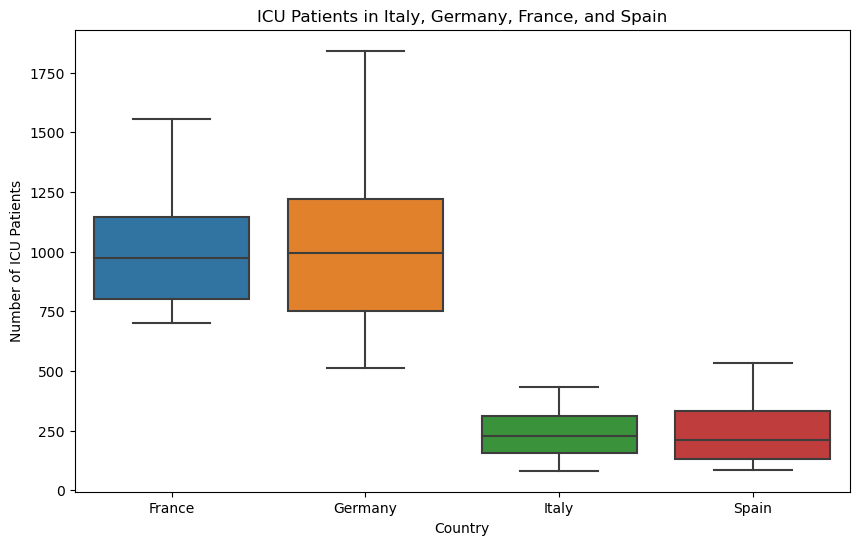

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
France,335.0,998.379104,220.152715,699.0,803.0,972.0,1145.5,1557.0
Germany,365.0,1022.386301,306.113714,512.0,753.0,994.0,1221.0,1842.0
Italy,365.0,231.254795,91.607400,82.0,157.0,227.0,310.0,434.0
Spain,365.0,233.128767,119.054920,84.0,133.0,212.0,332.0,533.0


In [17]:
# Filtering data for Italy, Germany, France, and Spain

countries = ['Italy', 'Germany', 'France', 'Spain']
filt_data =covid[(covid['location'].isin(countries)) &
                   (covid['date'] >= '2022-05-01') & (covid['date'] <= '2023-04-30')]

#checking how many null values are in icu_patients column against the total number of rows in the dataset.
covid.icu_patients.isna
covid.icu_patients.isna().sum()

# Removing the null values
filt_data.dropna(subset=['icu_patients'], inplace=True) 

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=filt_data)
plt.title('ICU Patients in Italy, Germany, France, and Spain')
plt.xlabel('Country')
plt.ylabel('Number of ICU Patients')
plt.show()
#Germany has the highest number of patients in ICU with the highest number as 1845 patients and 75% almost at 1221 patients. 
#50% of patients in ICU for France and Germany range almost the same at 972 and 994 patients
#Italy and Spain have a low number of patients in the period with a min number of around 82 and 84 and max close to 500 and 500 consequetively as shown.
filt_data.groupby("location").icu_patients.describe()

Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [16]:
data_2023 = (covid['date'].dt.year == 2023)

filt_countries_2023 = covid[data_2023 & 
                   (covid['location'].isin(countries))]

#checking total number of null values
filt_countries_2023.hosp_patients.isna().sum()

#replacing nulls with 0
filt_countries_2023['hosp_patients'].fillna(0, inplace=True)

#Total number of hospitalized patients in 2023
total_hosp_patients = filt_countries_2023.groupby('location')['hosp_patients'].sum()

print('The total number of hostitalized patients in 2023 was :',total_hosp_patients)

The total number of hostitalized patients in 2023 was : location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [15]:
pd.options.mode.copy_on_write = True 